In [47]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
df = pd.read_csv('ams23.csv')
df.head()

,Frame,N_Person,Xcenter,Ycenter,PerXmin,PerYmin,PerXmax,PerYmax,N_Handgun,HgXcenter,...,HgYmin,HgXmax,HgYmax,Intersection,Included_Center,Intersection_Area,Hg_Area,Distance,Ground_Truth,GT
0,0,0,474.999451,309.582947,395.377251,156.402725,554.621651,462.763168,0,409.881988,...,176.115577,425.699604,203.980340,Center_left,1,844.925198,881.508223,136.120892,0,MLP
1,1,0,474.938843,309.623566,395.161308,156.591705,554.716377,462.655426,0,409.638031,...,176.050999,425.668627,203.878841,Center_left,1,848.952861,892.193796,136.317231,0,MLP
2,2,0,475.070465,309.475372,395.484291,156.138077,554.656639,462.812668,0,409.610718,...,175.932056,425.627609,203.722820,Center_left,1,837.705837,890.243298,136.384041,0,MLP
3,3,0,476.837311,308.901245,399.288238,154.448364,554.386383,463.354126,0,408.519043,...,177.653896,423.709709,202.787083,Center_left,1,613.789372,763.579688,136.939795,0,MLP
4,4,0,476.918640,308.815064,399.598404,154.249756,554.238876,463.380371,0,408.613525,...,177.582060,423.771116,202.885134,Center_left,1,611.643926,767.067283,136.847188,0,MLP


In [49]:
len(df)

18497

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18497 entries, 0 to 18496
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Frame              18497 non-null  int64  
 1   N_Person           18497 non-null  int64  
 2   Xcenter            18497 non-null  float64
 3   Ycenter            18497 non-null  float64
 4   PerXmin            18497 non-null  float64
 5   PerYmin            18497 non-null  float64
 6   PerXmax            18497 non-null  float64
 7   PerYmax            18497 non-null  float64
 8   N_Handgun          18497 non-null  int64  
 9   HgXcenter          18497 non-null  float64
 10  HgYcenter          18497 non-null  float64
 11  HgXmin             18497 non-null  float64
 12  HgYmin             18497 non-null  float64
 13  HgXmax             18497 non-null  float64
 14  HgYmax             18497 non-null  float64
 15  Intersection       18497 non-null  object 
 16  Included_Center    184

In [51]:
df.nunique()

Frame                 1933
N_Person                 5
Xcenter              14250
Ycenter              14231
PerXmin              14258
PerYmin              14255
PerXmax              14258
PerYmax              14235
N_Handgun                5
HgXcenter             7301
HgYcenter             7299
HgXmin                7303
HgYmin                7303
HgXmax                7303
HgYmax                7302
Intersection             9
Included_Center          2
Intersection_Area     8467
Hg_Area               7303
Distance             18497
Ground_Truth             3
GT                       3
dtype: int64

In [52]:
df['Ground_Truth'].value_counts()

0    15960
1     2307
2      230
Name: Ground_Truth, dtype: int64

In [53]:
df2 = pd.get_dummies(df,columns=['Intersection'])
df2.head()

,Frame,N_Person,Xcenter,Ycenter,PerXmin,PerYmin,PerXmax,PerYmax,N_Handgun,HgXcenter,...,GT,Intersection_Center_left,Intersection_Center_right,Intersection_Down_center,Intersection_Down_left,Intersection_Inside,Intersection_No_intersection,Intersection_Up_center,Intersection_Up_left,Intersection_Up_right
0,0,0,474.999451,309.582947,395.377251,156.402725,554.621651,462.763168,0,409.881988,...,MLP,1,0,0,0,0,0,0,0,0
1,1,0,474.938843,309.623566,395.161308,156.591705,554.716377,462.655426,0,409.638031,...,MLP,1,0,0,0,0,0,0,0,0
2,2,0,475.070465,309.475372,395.484291,156.138077,554.656639,462.812668,0,409.610718,...,MLP,1,0,0,0,0,0,0,0,0
3,3,0,476.837311,308.901245,399.288238,154.448364,554.386383,463.354126,0,408.519043,...,MLP,1,0,0,0,0,0,0,0,0
4,4,0,476.918640,308.815064,399.598404,154.249756,554.238876,463.380371,0,408.613525,...,MLP,1,0,0,0,0,0,0,0,0


In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18497 entries, 0 to 18496
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         18497 non-null  int64  
 1   N_Person                      18497 non-null  int64  
 2   Xcenter                       18497 non-null  float64
 3   Ycenter                       18497 non-null  float64
 4   PerXmin                       18497 non-null  float64
 5   PerYmin                       18497 non-null  float64
 6   PerXmax                       18497 non-null  float64
 7   PerYmax                       18497 non-null  float64
 8   N_Handgun                     18497 non-null  int64  
 9   HgXcenter                     18497 non-null  float64
 10  HgYcenter                     18497 non-null  float64
 11  HgXmin                        18497 non-null  float64
 12  HgYmin                        18497 non-null  float64
 13  H

# Random Forest 
## Todos los predictores

In [55]:
pred = dict(zip(df2.Ground_Truth.unique(),df2.GT.unique()))
print(pred)

{0: 'MLP', 2: 'SVM', 1: 'LR'}


In [56]:
print(df2['Ground_Truth'].value_counts())

0    15960
1     2307
2      230
Name: Ground_Truth, dtype: int64


In [57]:
df3 = df2.drop(columns=["GT"])

In [58]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18497 entries, 0 to 18496
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         18497 non-null  int64  
 1   N_Person                      18497 non-null  int64  
 2   Xcenter                       18497 non-null  float64
 3   Ycenter                       18497 non-null  float64
 4   PerXmin                       18497 non-null  float64
 5   PerYmin                       18497 non-null  float64
 6   PerXmax                       18497 non-null  float64
 7   PerYmax                       18497 non-null  float64
 8   N_Handgun                     18497 non-null  int64  
 9   HgXcenter                     18497 non-null  float64
 10  HgYcenter                     18497 non-null  float64
 11  HgXmin                        18497 non-null  float64
 12  HgYmin                        18497 non-null  float64
 13  H

In [59]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df3, test_size=0.2, random_state=123)
X_train, y_train = train_df.drop(columns=["Ground_Truth"], axis=1), train_df["Ground_Truth"]
X_test, y_test = test_df.drop(columns=["Ground_Truth"], axis=1), test_df["Ground_Truth"]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14797, 28) (14797,)
(3700, 28) (3700,)


In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

clf = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=0)
y_pred = clf.fit(X_train, y_train).predict(X_test)
scores = pd.DataFrame(cross_validate(clf, X_train, y_train, cv=10, return_train_score=True))
print("mean_train = ", scores['train_score'].mean())
print("mean_test = ", scores['test_score'].mean())
scores

mean_train =  0.9397099630332937
mean_test =  0.9379600442227216


,fit_time,score_time,test_score,train_score
0,0.158589,0.003948,0.943243,0.939326
1,0.152548,0.006031,0.941216,0.941428
2,0.146643,0.006996,0.935811,0.934144
3,0.165954,0.003981,0.943919,0.946610
4,0.163159,0.004062,0.932432,0.936097
5,0.138603,0.006981,0.940541,0.939776
6,0.153189,0.002960,0.933784,0.935496
7,0.152562,0.005997,0.932387,0.939405
8,0.134718,0.003978,0.939824,0.943385
9,0.147632,0.002995,0.936444,0.941433


                         feature  importance       std
26          Intersection_Up_left    0.000000  0.000000
25        Intersection_Up_center    0.000000  0.000000
21      Intersection_Down_center    0.000000  0.000000
22        Intersection_Down_left    0.000000  0.000000
27         Intersection_Up_right    0.000043  0.000128
8                      N_Handgun    0.000073  0.000220
19      Intersection_Center_left    0.000548  0.001152
1                       N_Person    0.003451  0.007174
15               Included_Center    0.003533  0.007208
23           Intersection_Inside    0.003745  0.006079
24  Intersection_No_intersection    0.009663  0.028989
20     Intersection_Center_right    0.023213  0.043612
6                        PerXmax    0.024834  0.049532
11                        HgXmin    0.025268  0.034700
17                       Hg_Area    0.026490  0.065587
9                      HgXcenter    0.027161  0.046235
4                        PerXmin    0.029608  0.063107
13        

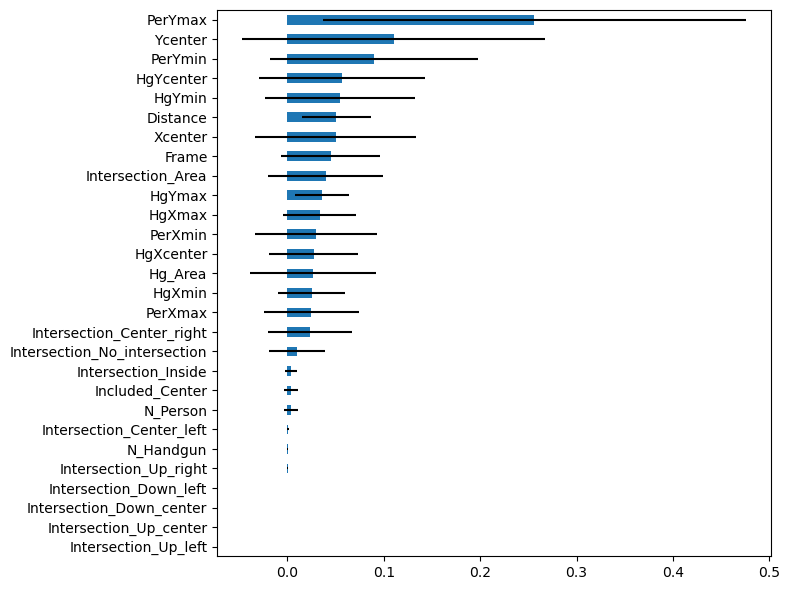

In [64]:
clf.fit(X_train.values, y_train.values)
predictions=clf.predict(X_test.values)
#Le agrego .values para solucionar el problema:
#C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
#https://stackoverflow.com/questions/69326639/sklearn-warning-valid-feature-names-in-version-1-0

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

df = pd.DataFrame({'feature': X_train.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(figsize=(8,6),kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      1.00      0.96      3190
           1       0.95      0.57      0.71       461
           2       1.00      0.61      0.76        49

    accuracy                           0.94      3700
   macro avg       0.96      0.72      0.81      3700
weighted avg       0.94      0.94      0.93      3700



In [66]:
from sklearn.metrics import accuracy_score
print("Score train = ", accuracy_score(y_test,predictions))

Score train =  0.9372972972972973


In [67]:
from sklearn.metrics import precision_score
precision_score(y_test,predictions, average='macro')

0.9626890373389045

In [68]:
from sklearn.metrics import recall_score
recall_score(y_test,predictions, average='macro')

0.7247767278189471

In [69]:
from sklearn.metrics import f1_score
f1_score(y_test,predictions, average='macro')

0.8114905050151001

In [70]:
# save the model to disk
filename = 'rfc_model_intersection.sav'
pickle.dump(clf, open(filename, 'wb')) 

# Redes Neuronales - Todos los predictores

In [21]:
X = df3.drop('Ground_Truth',axis='columns')
y = df3.Ground_Truth

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18497 entries, 0 to 18496
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         18497 non-null  int64  
 1   N_Person                      18497 non-null  int64  
 2   Xcenter                       18497 non-null  float64
 3   Ycenter                       18497 non-null  float64
 4   PerXmin                       18497 non-null  float64
 5   PerYmin                       18497 non-null  float64
 6   PerXmax                       18497 non-null  float64
 7   PerYmax                       18497 non-null  float64
 8   N_Handgun                     18497 non-null  int64  
 9   HgXcenter                     18497 non-null  float64
 10  HgYcenter                     18497 non-null  float64
 11  HgXmin                        18497 non-null  float64
 12  HgYmin                        18497 non-null  float64
 13  H

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:3]
#X_scaled.shape

array([[-1.86318429, -1.00623353,  0.38689315, -1.05795359,  0.40796004,
        -0.80148152,  0.35018454, -1.42606094, -0.49686525,  0.64862085,
        -1.25770626,  0.70126249, -1.1765673 ,  0.59456882, -1.33417994,
         1.17667153, -0.05021897, -0.63093209, -0.69650124,  2.66897134,
        -0.28327186, -0.01644345, -0.01039891, -0.53883052, -1.08437155,
        -0.11963423, -0.06163419, -0.13887741],
       [-1.86101506, -1.00623353,  0.3866075 , -1.05736343,  0.40697805,
        -0.79979265,  0.35063001, -1.42880718, -0.49686525,  0.64702523,
        -1.25856002,  0.69825989, -1.17721827,  0.59436779, -1.33523843,
         1.17667153, -0.04779851, -0.62503219, -0.69507303,  2.66897134,
        -0.28327186, -0.01644345, -0.01039891, -0.53883052, -1.08437155,
        -0.11963423, -0.06163419, -0.13887741],
       [-1.85884582, -1.00623353,  0.38722785, -1.05951656,  0.4084468 ,
        -0.80384661,  0.35034908, -1.42479924, -0.49686525,  0.64684659,
        -1.25997355,  0.6981

In [24]:
print(scaler.mean_)

[8.58912743e+02 8.79439909e-01 3.92910451e+02 3.82398852e+02
 3.05665487e+02 2.46086410e+02 4.80155414e+02 5.18711294e+02
 2.98480835e-01 3.10712804e+02 3.12374381e+02 2.87345702e+02
 2.92834884e+02 3.34079906e+02 3.31913878e+02 4.19365302e-01
 9.28490131e+02 2.02421631e+03 2.31870596e+02 1.23101043e-01
 7.42823161e-02 2.70314105e-04 1.08125642e-04 2.25009461e-01
 5.40411959e-01 1.41103963e-02 3.78439747e-03 1.89219873e-02]


In [25]:
print(scaler.scale_)

[4.60991833e+02 8.73991854e-01 2.12174858e+02 6.88271261e+01
 2.19903311e+02 1.11897384e+02 2.12648552e+02 3.92326331e+01
 6.00727934e-01 1.52892379e+02 9.72615204e+01 1.52180777e+02
 9.92032562e+01 1.54094354e+02 9.58892688e+01 4.93455211e-01
 1.66401144e+03 1.81114275e+03 1.37472411e+02 3.28553156e-01
 2.62229772e-01 1.64390096e-02 1.03977859e-02 4.17588558e-01
 4.98364198e-01 1.17946144e-01 6.14009430e-02 1.36249572e-01]


In [26]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=10) #stratify hace que el ratio entre 0 y 1 se mantenga en la distri. entre el test(y). 

In [27]:
X_train.shape

(13872, 28)

In [28]:
y_train.value_counts()

0    11969
1     1730
2      173
Name: Ground_Truth, dtype: int64

In [29]:
X_test.shape

(4625, 28)

In [30]:
y_test.value_counts()

0    3991
1     577
2      57
Name: Ground_Truth, dtype: int64

In [31]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(hidden_layer_sizes=(25,25,25,25), max_iter=500, alpha=0.0001, solver='adam',
                 random_state=0, tol=0.000000001)
y_pred = clf.fit(X_train, y_train).predict(X_test)
predictions_mlp=clf.predict_proba(X_test)
predictions_mlp

array([[1.00000000e+00, 1.21623969e-10, 2.75760914e-10],
       [1.00000000e+00, 3.37634054e-11, 1.29576109e-11],
       [9.98954915e-01, 1.04329384e-03, 1.79115237e-06],
       ...,
       [1.00000000e+00, 1.85734776e-11, 1.11921722e-11],
       [1.00000000e+00, 1.85385437e-15, 3.32457905e-16],
       [2.41300242e-06, 9.99982252e-01, 1.53350576e-05]])

In [32]:
predictions_mlp=clf.predict(X_test)
predictions_mlp

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_mlp))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3991
           1       0.95      0.91      0.93       577
           2       0.90      0.82      0.86        57

    accuracy                           0.98      4625
   macro avg       0.95      0.91      0.93      4625
weighted avg       0.98      0.98      0.98      4625



In [35]:
print("Score train = ",clf.score(X_train, y_train))
print("Score test = ",clf.score(X_test, y_test))

Score train =  0.989042675893887
Score test =  0.9814054054054054


In [42]:
from sklearn.metrics import accuracy_score
print("Score train = ", accuracy_score(y_test,predictions_mlp))

Score train =  0.9814054054054054


In [43]:
from sklearn.metrics import precision_score
precision_score(y_test,predictions_mlp, average='macro')

0.9457623288551819

In [44]:
from sklearn.metrics import recall_score
recall_score(y_test,predictions_mlp, average='macro')

0.9104638776255564

In [45]:
from sklearn.metrics import f1_score
f1_score(y_test,predictions_mlp, average='macro')

0.9274073327999385

In [36]:
# save the model to disk
filename = 'mlp_model_intersection.sav'
pickle.dump(clf, open(filename, 'wb')) 